#**MEDICAL INSURANCE PREMIUM PREDICTION:**

dataset=['insurance.csv']

---



#**OVERVIEW:**
Medical insurance is a crucial aspect of healthcare and financial planning. In the past, individuals relied on the offline way i.e., insurance agents to predict the amount they should pay in premiums for medical insurance. Health insurance premiums are dependent on various factors like existing diseases, historical diseases, age, BMI, physical fitness,

 The dataset consists of 7 columns, which are age, sex, BMI, children, smoker, region, and expenses. The expenses column is the predictor variable

Contents:

Understanding Dataset

(EDA)

Feature Encoding

Feature and Target Segregation

Train Test Split

Feature Normalization

Model Building

1. Linear Regression Model
2. Random Forest Regressor
3. Gradiant boosting
Feature Importance



---



In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [80]:
data=pd.read_csv("/content/insurance.csv")
data

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [82]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [83]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


###**EDA**

**NUM DISTRIBUTION**

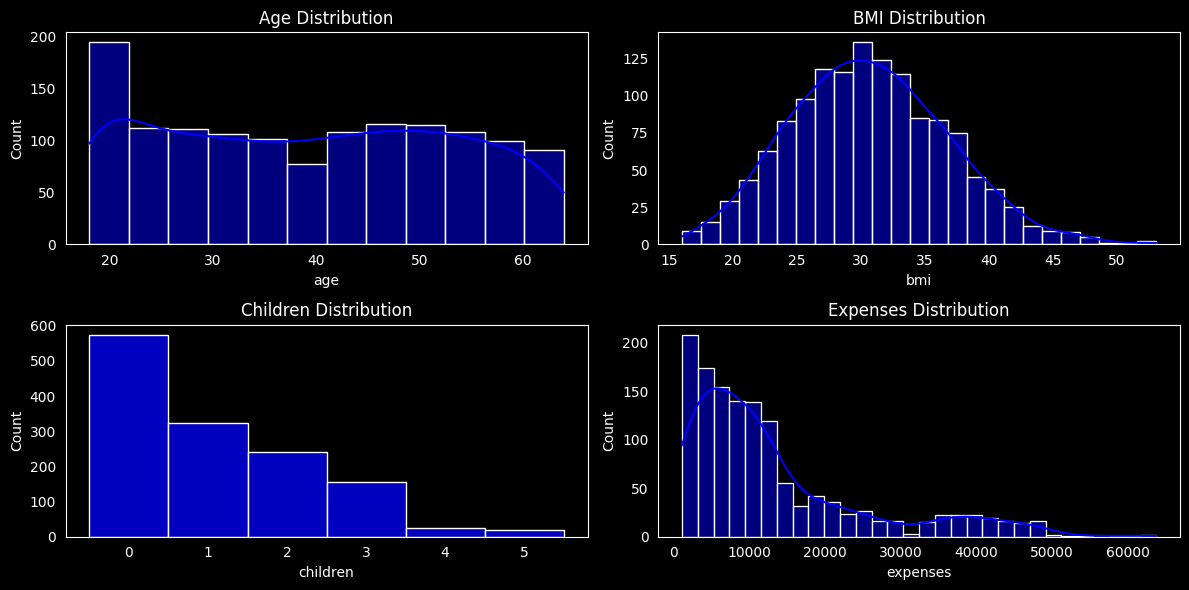

In [84]:
plt.style.use('dark_background')
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data['age'], kde=True, color='blue')
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.histplot(data['bmi'], kde=True, color='blue')
plt.title('BMI Distribution')

plt.subplot(2, 2, 3)
sns.histplot(data['children'], discrete=True, color='blue')
plt.title('Children Distribution')

plt.subplot(2, 2, 4)
sns.histplot(data['expenses'], kde=True, color='blue')
plt.title('Expenses Distribution')

plt.tight_layout()
plt.show()

**BIVARIATE ANALYSIS**

<ipython-input-85-fc6696f70808>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='Blues')


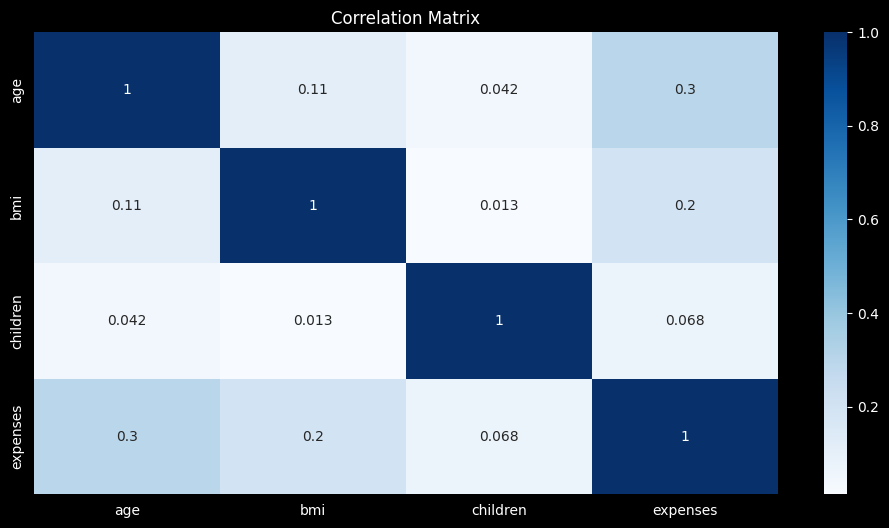

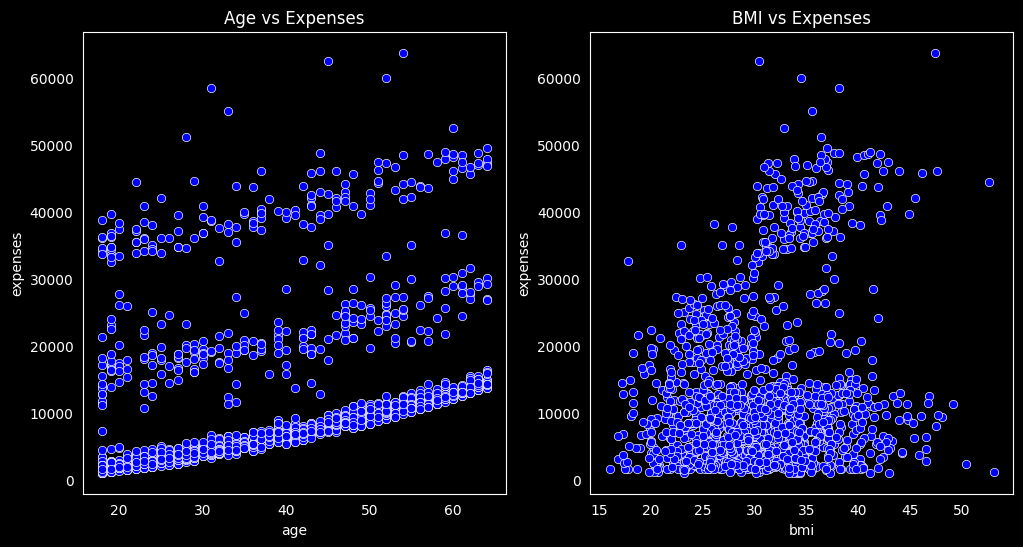

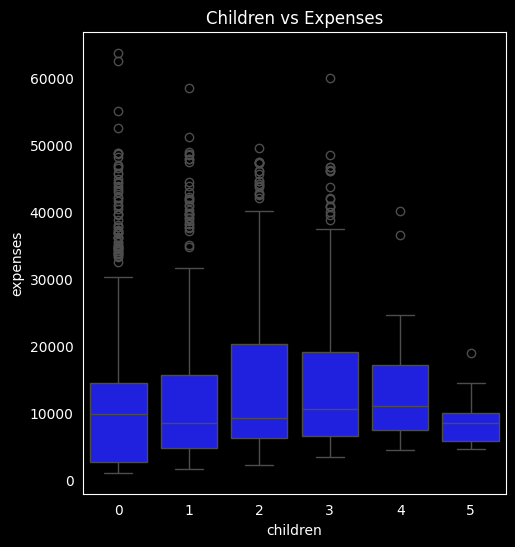

In [85]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='age', y='expenses', color='blue')
plt.title('Age vs Expenses')

plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='bmi', y='expenses', color='blue')
plt.title('BMI vs Expenses')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='children', y='expenses', color='blue')
plt.title('Children vs Expenses')

plt.show()

.correlation plots, the expenses column is most correlated with the age column

**IDENTIFYING OUTLIERS AND HANDLING**

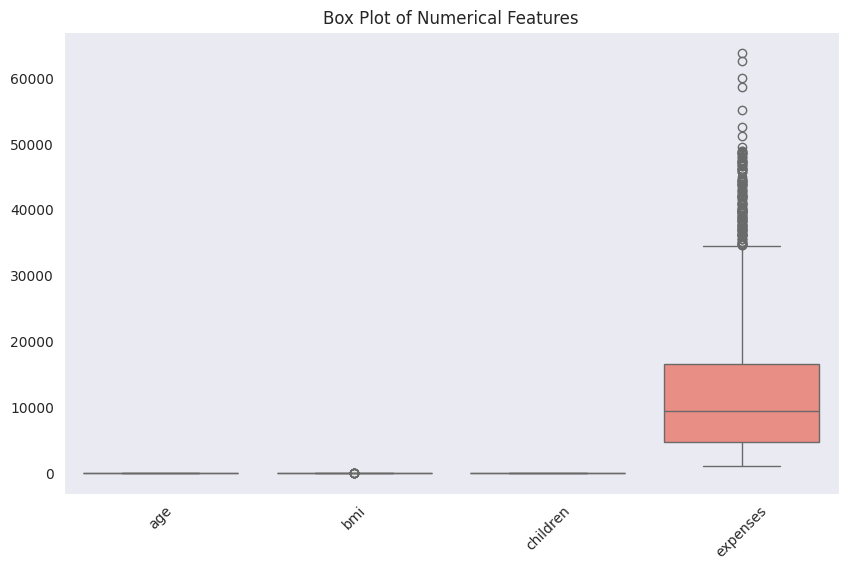

In [86]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, orient='v')
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()


In [87]:
trimmed_data = data[(data['expenses'] >= lower_bound) & (data['expenses'] <= upper_bound)]
capped_data = data.copy()
capped_data['expenses'] = capped_data['expenses'].clip(lower=lower_bound, upper=upper_bound)

**FEATURE ENCODING**

In [88]:
sex = {'male': 1,'female': 0}
smoker = {'yes': 1,'no': 0}
data.sex = [sex[item] for item in data.sex]
data.smoker = [smoker[item] for item in data.smoker]

In [89]:
dummies_r = pd.get_dummies(data["region"], prefix="region")
data = pd.concat([data,dummies_r], axis=1)
data = data.drop("region", axis=1)

**FEATURE SEPERATION**

In [91]:
X = data.drop(['expenses'],axis=1)
y=data['expenses']

**SPLITTING DATA**

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

**FEATURE NORMALIZATION**

In [93]:
num_cols = X_train.select_dtypes(include=['float', 'int']).columns

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_train[num_cols] = minmax.fit_transform(X_train[num_cols])
X_test[num_cols] = minmax.transform(X_test[num_cols])

**MODEL BUILDING**

**LINEAR REGRESSION**

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = LinearRegression().fit(X_train, y_train)
predictions = model.predict(X_test)

rounded_predictions = np.round(predictions)

print('Predicted labels: ', rounded_predictions[:10])
print('Actual labels   : ', y_test[:10])

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('Mean Squared Error (MSE): ', mse)
print('R-squared (R2): ', r2)


Predicted labels:  [11170.  9495. 38192. 16273.  6930.  3970.  1574. 14391.  9010.  7521.]
Actual labels   :  578      9724.53
610      8547.69
569     45702.02
1034    12950.07
198      9644.25
981      4500.34
31       2198.19
1256    11436.74
1219     7537.16
1320     5425.02
Name: expenses, dtype: float64
Mean Squared Error (MSE):  31823064.32345026
R-squared (R2):  0.8000184017333829


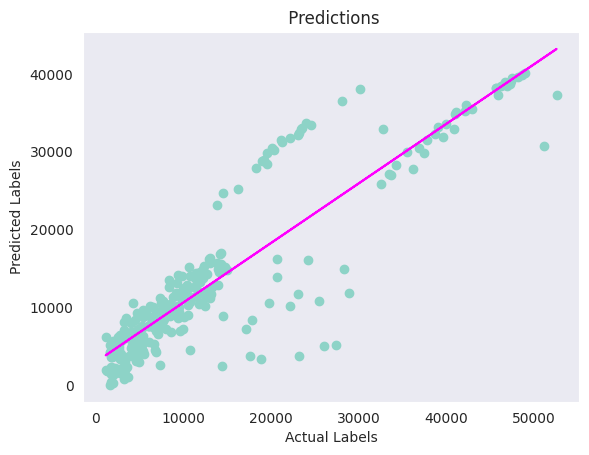

MSE: 31823064.32345026
RMSE: 5641.193519411496
R2: 0.8000184017333829


In [96]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title(' Predictions')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

**RANDOMFOREST**

MSE: 19126123.07655157
RMSE: 4373.342323275366
R2: 0.8798081598108614


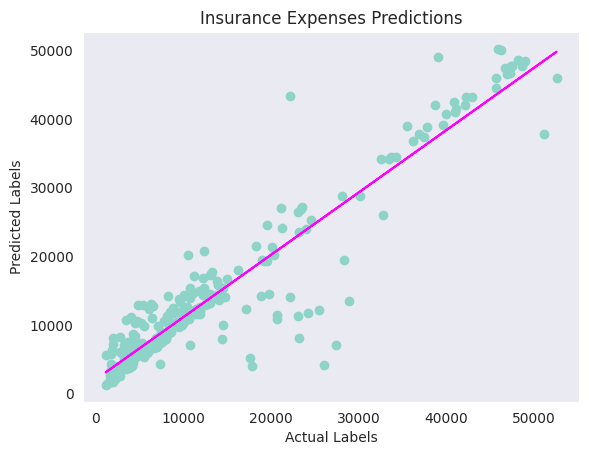

In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model_rf = RandomForestRegressor().fit(X_train, y_train)

predictions = model_rf.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Insurance Expenses Predictions')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')

plt.show()


**GRADIANT BOOSTING**

Gradient Boosting Regression:
MSE: 16405852.546332808
RMSE: 4050.413873461922
R2: 0.8969028067254846


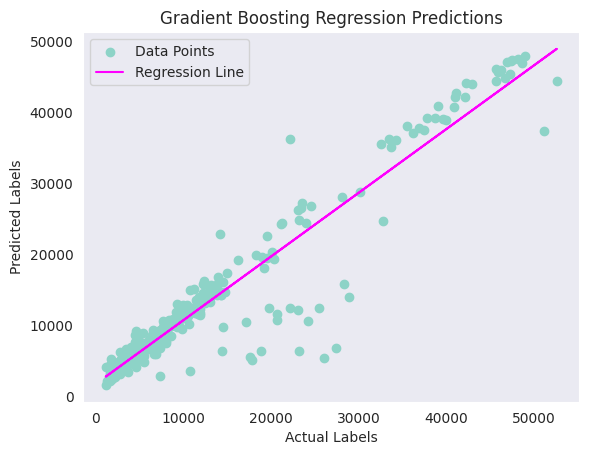

In [98]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor().fit(X_train, y_train)
predictions_gb = model_gb.predict(X_test)

mse_gb = mean_squared_error(y_test, predictions_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, predictions_gb)
print("Gradient Boosting Regression:")
print("MSE:", mse_gb)
print("RMSE:", rmse_gb)
print("R2:", r2_gb)

plt.scatter(y_test, predictions_gb, label='Data Points')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Gradient Boosting Regression Predictions')

z = np.polyfit(y_test, predictions_gb, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta', label='Regression Line')

plt.legend()
plt.show()





**MODEL EVALUATION**

Model Evaluation Table:
               Model          MSE     RMSE     R2
0  Gradient Boosting  16556589.23  4068.98  0.896
1      Random Forest  19819584.55  4451.92  0.875
2  Linear Regression  31823064.32  5639.64  0.800


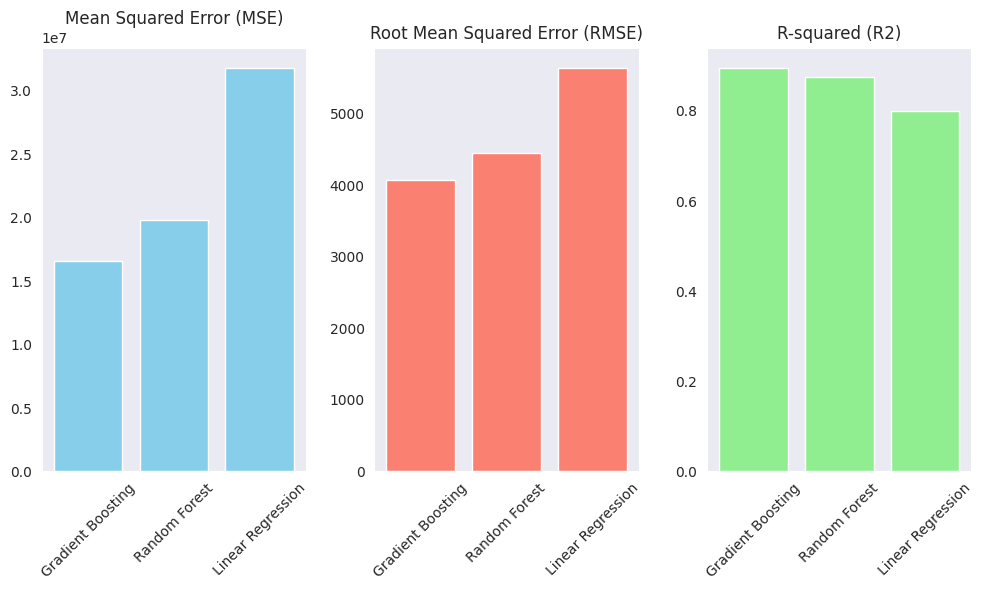

In [99]:

models = ['Gradient Boosting', 'Random Forest', 'Linear Regression']
mse_values = [16556589.23, 19819584.55, 31823064.32]
rmse_values = [4068.98, 4451.92, 5639.64]
r2_values = [0.896, 0.875, 0.800]

evaluation_df = pd.DataFrame({
    'Model': models,
    'MSE': mse_values,
    'RMSE': rmse_values,
    'R2': r2_values
})

print("Model Evaluation Table:")
print(evaluation_df)

plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.bar(models, mse_values, color='skyblue')
plt.title('Mean Squared Error (MSE)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
plt.bar(models, rmse_values, color='salmon')
plt.title('Root Mean Squared Error (RMSE)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
plt.bar(models, r2_values, color='lightgreen')
plt.title('R-squared (R2)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**FEATURE IMPORTANCE**

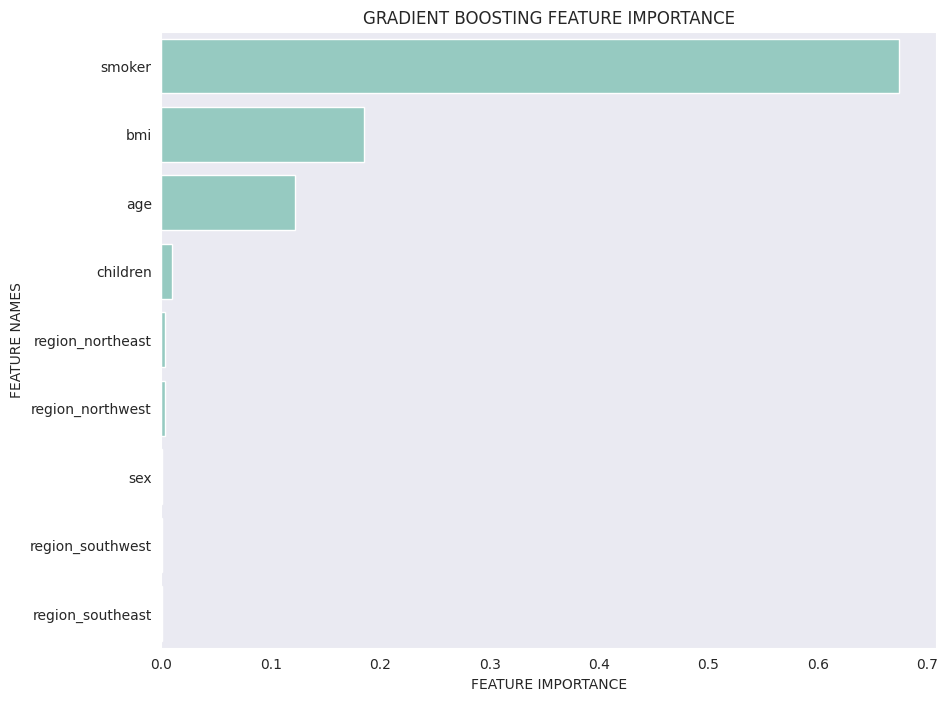

In [100]:
def plot_feature_importance(importance, names, model_type):

    data = {'feature_names': names, 'feature_importance': importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by='feature_importance', ascending=False, inplace=True)

      plt.figure(figsize=(10, 8))

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.show()

plot_feature_importance(feature_importances_gb, X_train.columns, 'GRADIENT BOOSTING')


.the top 3 features which influence the health insurance premium the most are Smoker, BMI, and Age.

---



**Summary:**

The project aimed to develop a machine learning model for medical insurance premium prediction. Using a dataset containing information about individuals' age, BMI, number of children, region, and medical expenses, the project applied various machine learning algorithms to predict insurance premiums accurately.

Key steps included exploratory data analysis (EDA) to understand the data distribution and relationships between variables, preprocessing steps such as handling missing values and encoding categorical variables, and model training and evaluation using regression algorithms like linear regression, random forest regression, and gradient boosting regression.